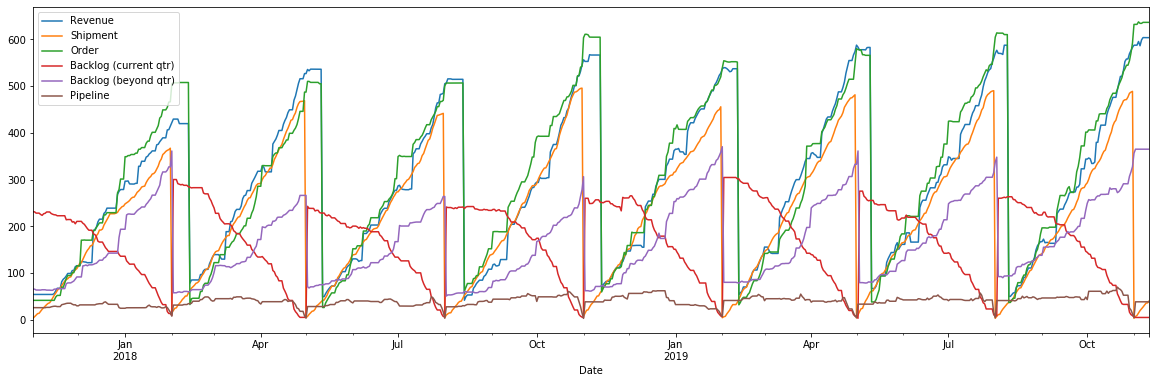

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import math

from sklearn.metrics import mean_squared_error

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df_ori = pd.read_excel('Data Science Full.xlsx',index_col="Date", parse_dates=True)
df_ori = df_ori.sort_index(ascending=True)
df_ori.plot(figsize=(20,6))

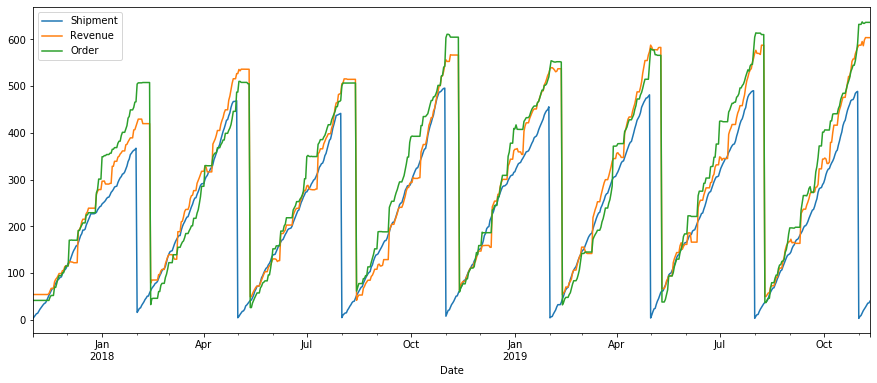

In [2]:
df_ori[["Shipment","Revenue","Order"]].plot(figsize=(15,6))

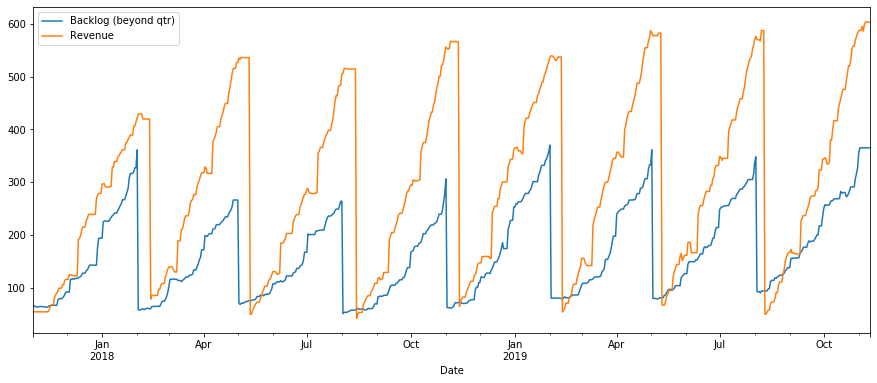

In [3]:
df_ori[["Backlog (beyond qtr)","Revenue"]].plot(figsize=(15,6))

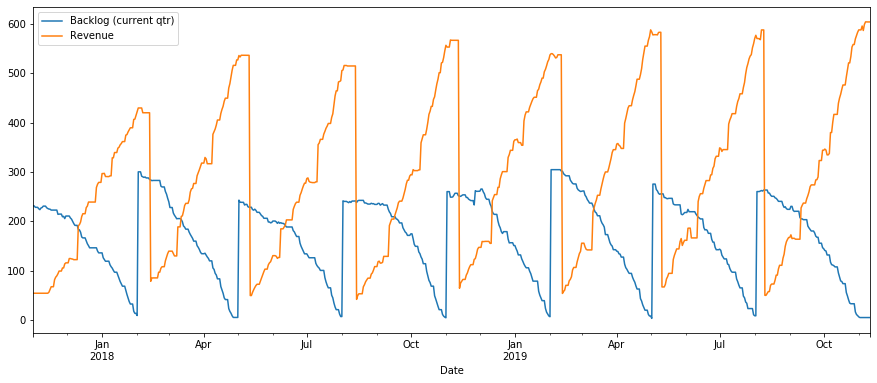

In [4]:
df_ori[["Backlog (current qtr)","Revenue"]].plot(figsize=(15,6))

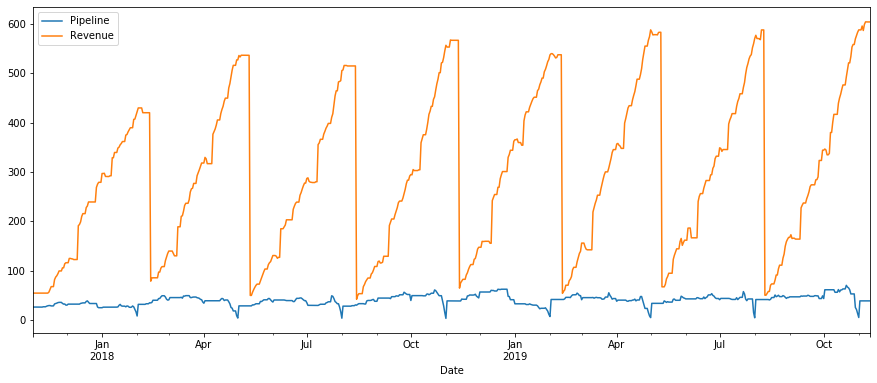

In [5]:
df_ori[["Pipeline","Revenue"]].plot(figsize=(15,6))

In [6]:
df_future_pred = pd.read_csv('Data_with_Forecast_Q2Q3.csv', index_col="Date", parse_dates=True)
df_future_pred = df_future_pred.sort_index(ascending=True)

df_future_actual = pd.read_excel('Data Science_Q220.xlsx', index_col="Date", parse_dates=True)
df_future_actual = df_future_actual.sort_index(ascending=True)

In [7]:
df_future_pred = df_future_pred.loc['2020-02-09':'2020-05-08']
df_future_pred.columns = df_future_pred.columns + '_pred'
df_future_pred.columns

Index(['Shipment_pred', 'Order_pred', 'Revenue_pred'], dtype='object')

In [8]:
df_future_actual = df_future_actual[['Shipment','Order','Revenue']].loc['2020-02-09':'2020-05-08']

In [9]:
df_compare = df_future_actual.copy()
df_compare[df_future_pred.columns] = df_future_pred
df_compare

,Shipment,Order,Revenue,Shipment_pred,Order_pred,Revenue_pred
Date,,,,,,
2020-02-09,39.164258,50.756868,30.622692,43.773235,604.624084,590.649658
2020-02-10,47.974312,50.756868,30.622692,47.143162,606.445557,593.242615
2020-02-11,53.989560,50.756868,30.622692,40.968861,181.841949,201.906616
2020-02-12,64.218424,50.756868,30.622692,59.794334,12.760710,37.015747
2020-02-13,70.455034,59.071915,53.459992,59.729164,43.333511,63.031620
...,...,...,...,...,...,...
2020-05-04,27.819237,599.123011,452.870200,32.834705,585.080383,575.391113
2020-05-05,39.300239,598.126100,454.140820,39.389885,580.200012,575.214661
2020-05-06,46.812132,598.126100,453.481150,44.261036,578.313416,577.282349


Test Score: 84.70 RMSE
Final Revenue Error: -28.87%


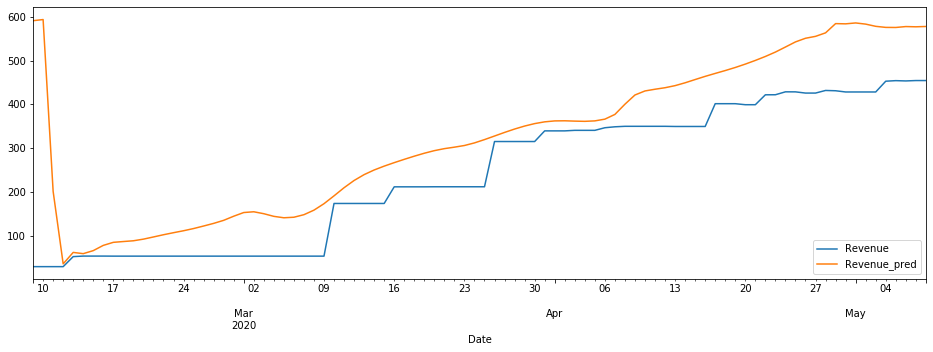

In [10]:
df_compare[['Revenue','Revenue_pred']].plot(figsize=(16,5))

RMSE = math.sqrt(mean_squared_error(df_compare["Revenue"].iloc[3:], df_compare["Revenue_pred"].iloc[3:]))
print('Test Score: %.2f RMSE' % (RMSE))

PE = 100*(df_compare["Revenue"].iloc[3:].max() - df_compare["Revenue_pred"].iloc[3:].max())/ df_compare["Revenue"].iloc[3:].max()
print('Final Revenue Error: %.2f%%' % (PE))

Test Score: 31.96 RMSE
Final Revenue Error: 0.61%


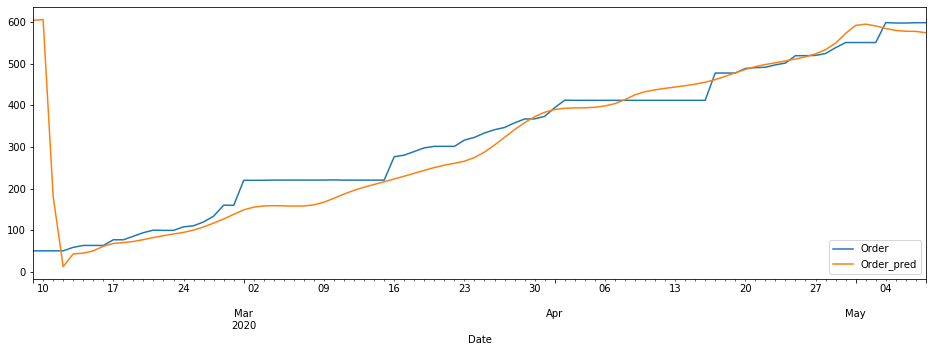

In [11]:
df_compare[['Order','Order_pred']].plot(figsize=(16,5))

RMSE = math.sqrt(mean_squared_error(df_compare["Order"].iloc[3:], df_compare["Order_pred"].iloc[3:]))
print('Test Score: %.2f RMSE' % (RMSE))

PE = 100*(df_compare["Order"].iloc[3:].max() - df_compare["Order_pred"].iloc[3:].max())/ df_compare["Order"].iloc[3:].max()
print('Final Revenue Error: %.2f%%' % (PE))

Test Score: 58.05 RMSE
Final Revenue Error: -30.33%


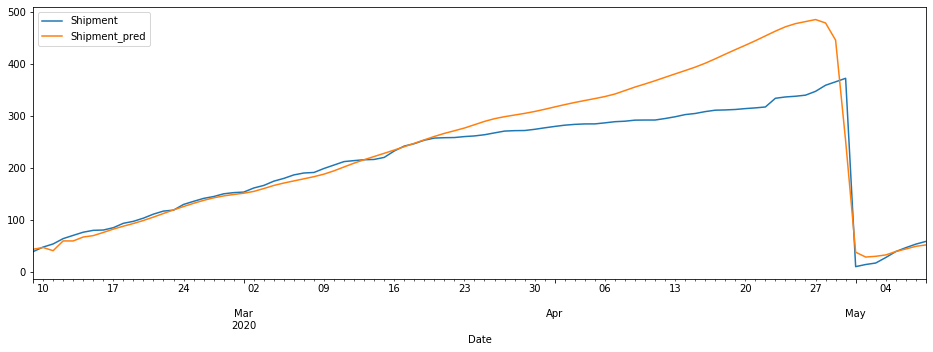

In [12]:
df_compare[['Shipment','Shipment_pred']].plot(figsize=(16,5))

RMSE = math.sqrt(mean_squared_error(df_compare["Shipment"].iloc[3:], df_compare["Shipment_pred"].iloc[3:]))
print('Test Score: %.2f RMSE' % (RMSE))

PE = 100*(df_compare["Shipment"].iloc[3:].max() - df_compare["Shipment_pred"].iloc[3:].max())/ df_compare["Shipment"].iloc[3:].max()
print('Final Revenue Error: %.2f%%' % (PE))

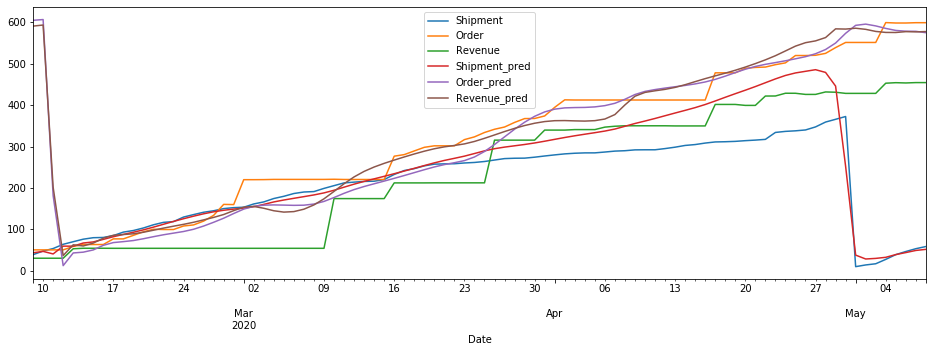

In [13]:
df_compare.plot(figsize=(16,5))